## Importing Essential Libraries 

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [69]:
#Loading dataset

# from google.colab import drive
# drive.mount("/content/drive")

## Loading Dataset

Dataset will be assigned the variable (df)

In [70]:
#  Reading Dataset and displaying first 5 rows
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
# df.head(5)
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [71]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Preprocessing of Data

Dropping the unnecessary column i.e Patient ID 

In [72]:
df= df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Exploring missing values 

In [73]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [75]:
ratio_of_missing_data =(df["bmi"].isnull().sum() / df.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9334637964774952 %


Dealing with Missing Data, using Median

In [77]:

# X = df[['bmi']]
# imputer = SimpleImputer(strategy='median')
# X_imputed_array = imputer.fit_transform(X)
# X_imputed = pd.DataFrame(X_imputed_array, columns=X.columns)
# X
median_bmi =df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace =True)


/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_20108/2163067964.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(median_bmi, inplace =True)


In [79]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Data Visualization 

Distribution of features - Categorical features 

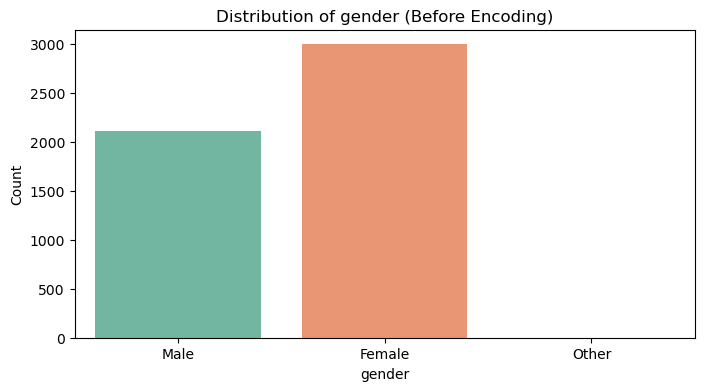

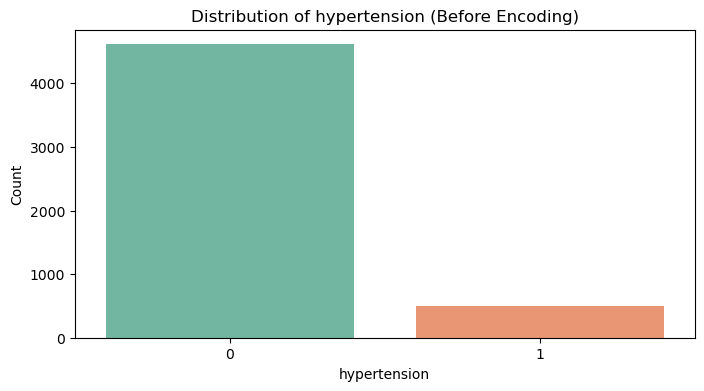

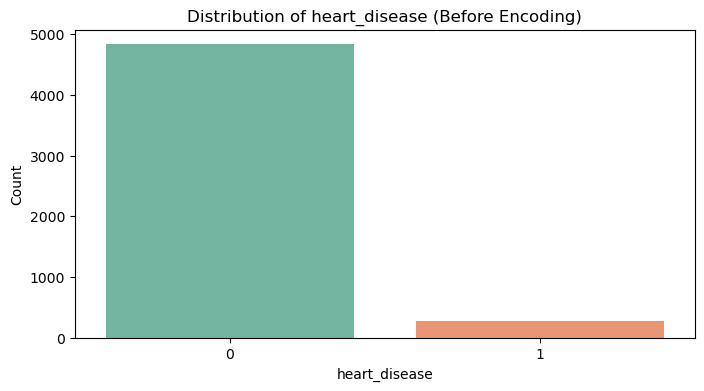

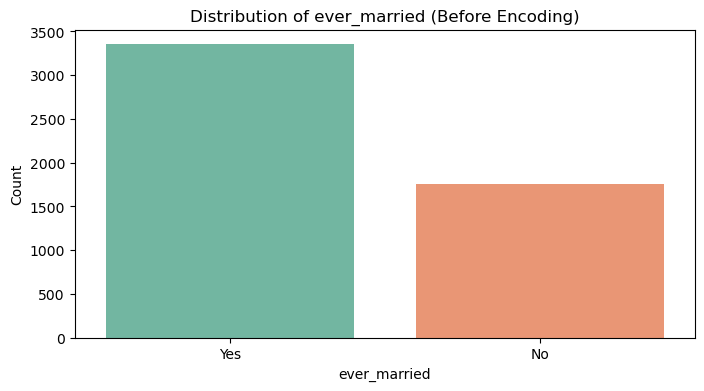

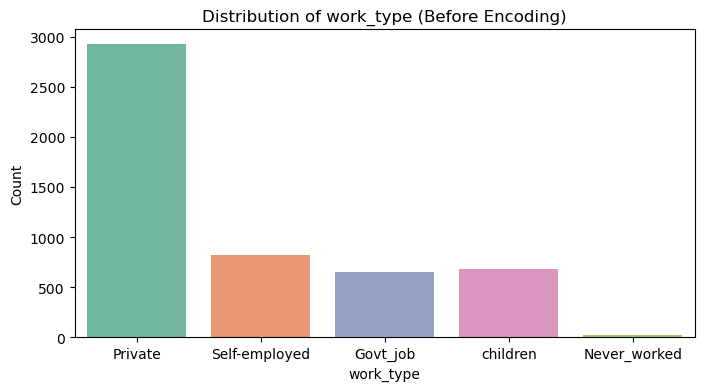

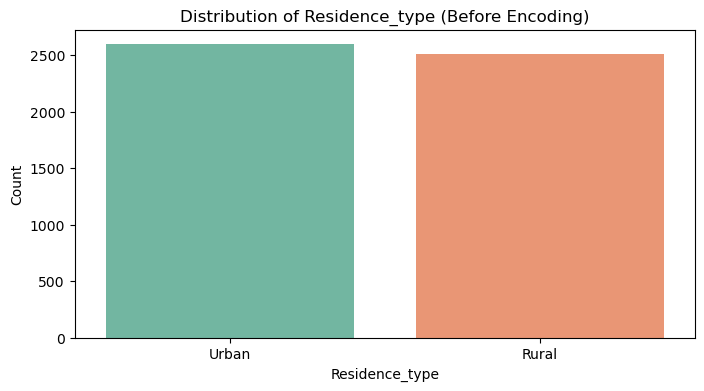

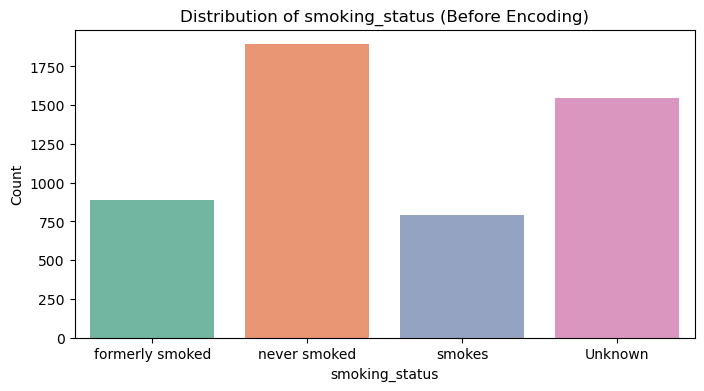

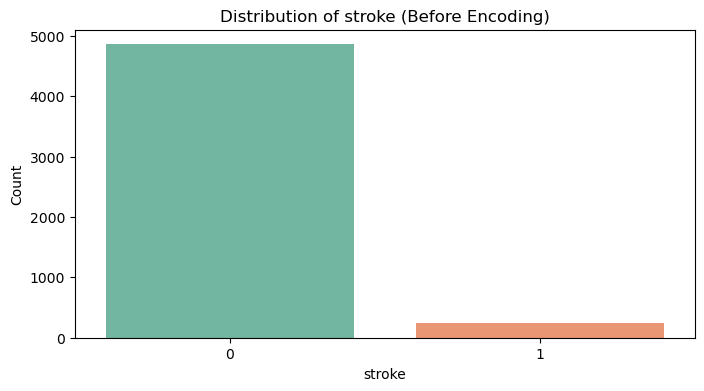

In [80]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature} (Before Encoding)')
    plt.xlabel(feature)
    plt.ylabel('Count')
 
    plt.show()

Distribution of numerical data

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


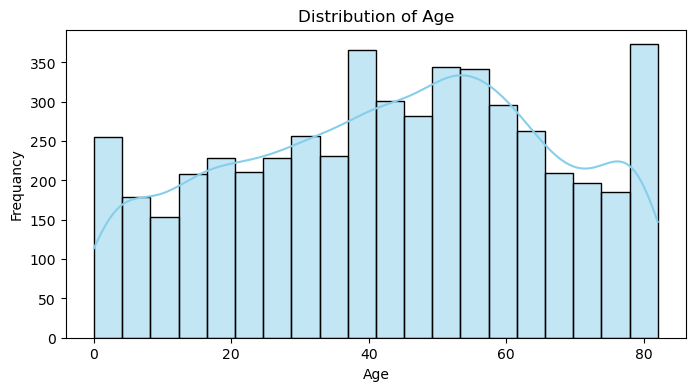

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


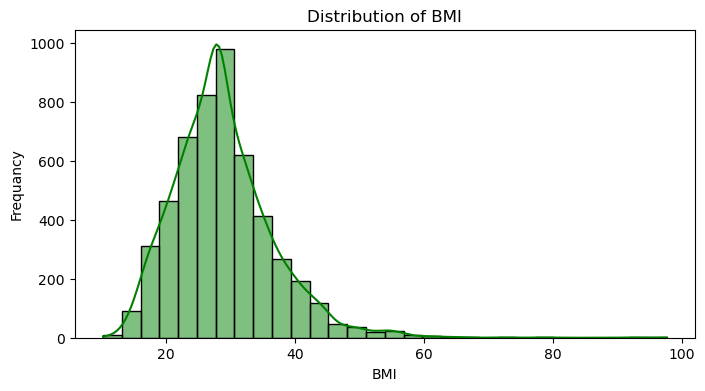

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


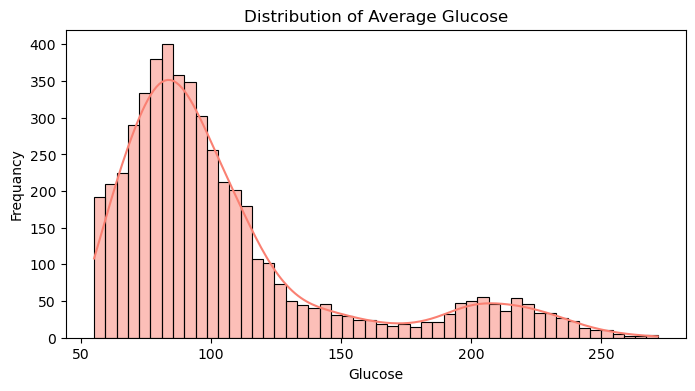

In [81]:
plt.figure(figsize=(8,4))
sns.histplot(df['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Exploring gender perecentage 

In [82]:

gender_counts = df['gender'].value_counts()
total_entries = len(df)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)


Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


Distribution of features by output

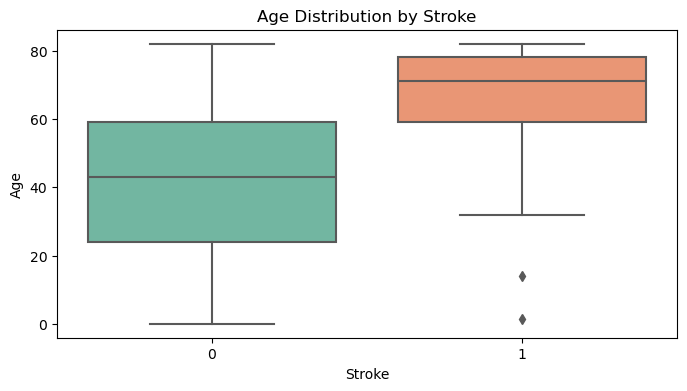

In [84]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

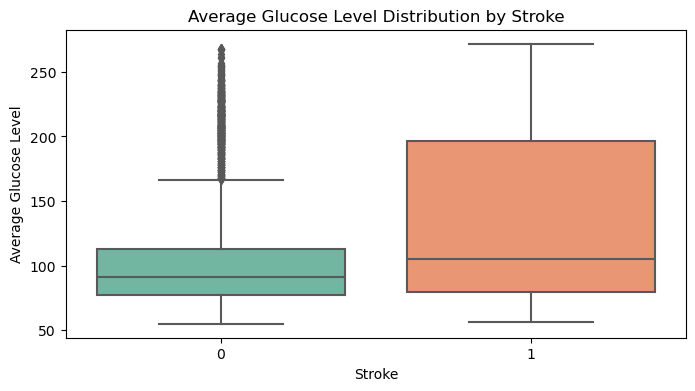

In [85]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

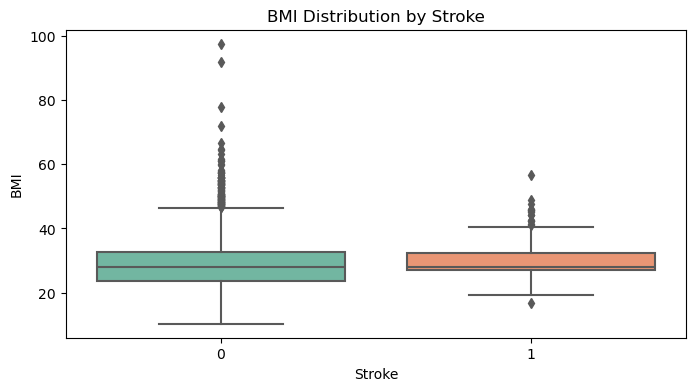

In [86]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

  Enconding of Categorical features : Based on data type, Using OneHotEncoder was chosen

In [21]:
from sklearn.preprocessing import OneHotEncoder
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_data = df[categorical_variables]
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
df = pd.concat([df.drop(columns=categorical_variables), encoded_dataframe], axis=1)
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Handeling Missing Values in BMI, Using Linear regression to fill in missing values 

In [83]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# df.head()
# testdf = df[df['bmi'].isnull()==True]
# traindf = df[df['bmi'].isnull()==False]
# y = traindf['bmi']
# traindf.drop("bmi",axis=1,inplace=True)
# lr.fit(traindf,y)
# testdf.drop("bmi",axis=1,inplace=True)
# pred = lr.predict(testdf)
# testdf['bmi']= pred
# df = testdf



1. Visualization : Distribution  of numerical features

Exploring realtionship between : age,bmi,and avg_glucose_level & stroke 

Ploting target variable

Relationship between 'age' and 'stroke'

#Above plot shows possibility of outliers that will be further invistigated 

Relationship betweeen 'avg_glucose_level' and 'stroke'

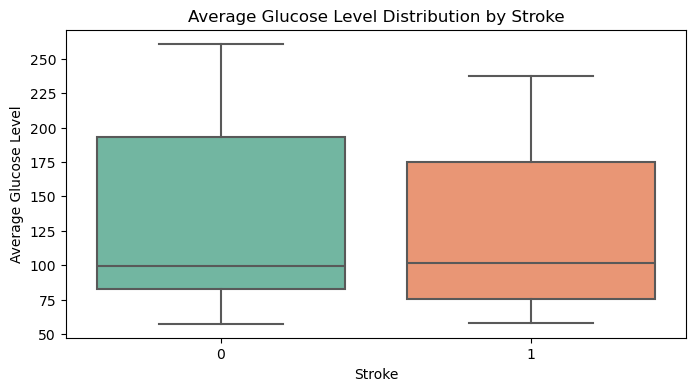

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

Relationship betweeen 'bmi' and 'stroke'

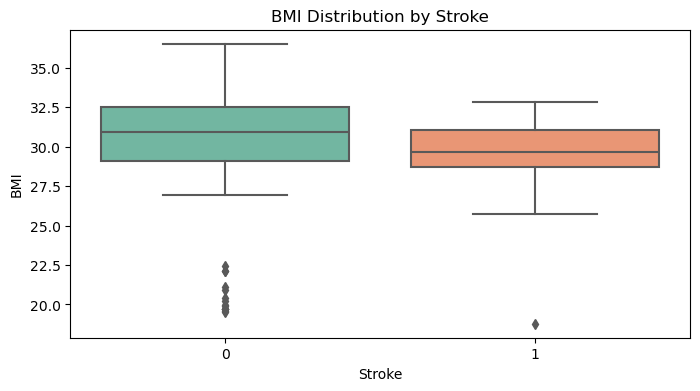

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

2. Visualization : Distribution of Categorical features

Categorical features are : ('hypertension', 'heart_disease','gender_Female', 'gender_Male','gender_Other', 'ever_married_No',,'ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children', 'Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes')


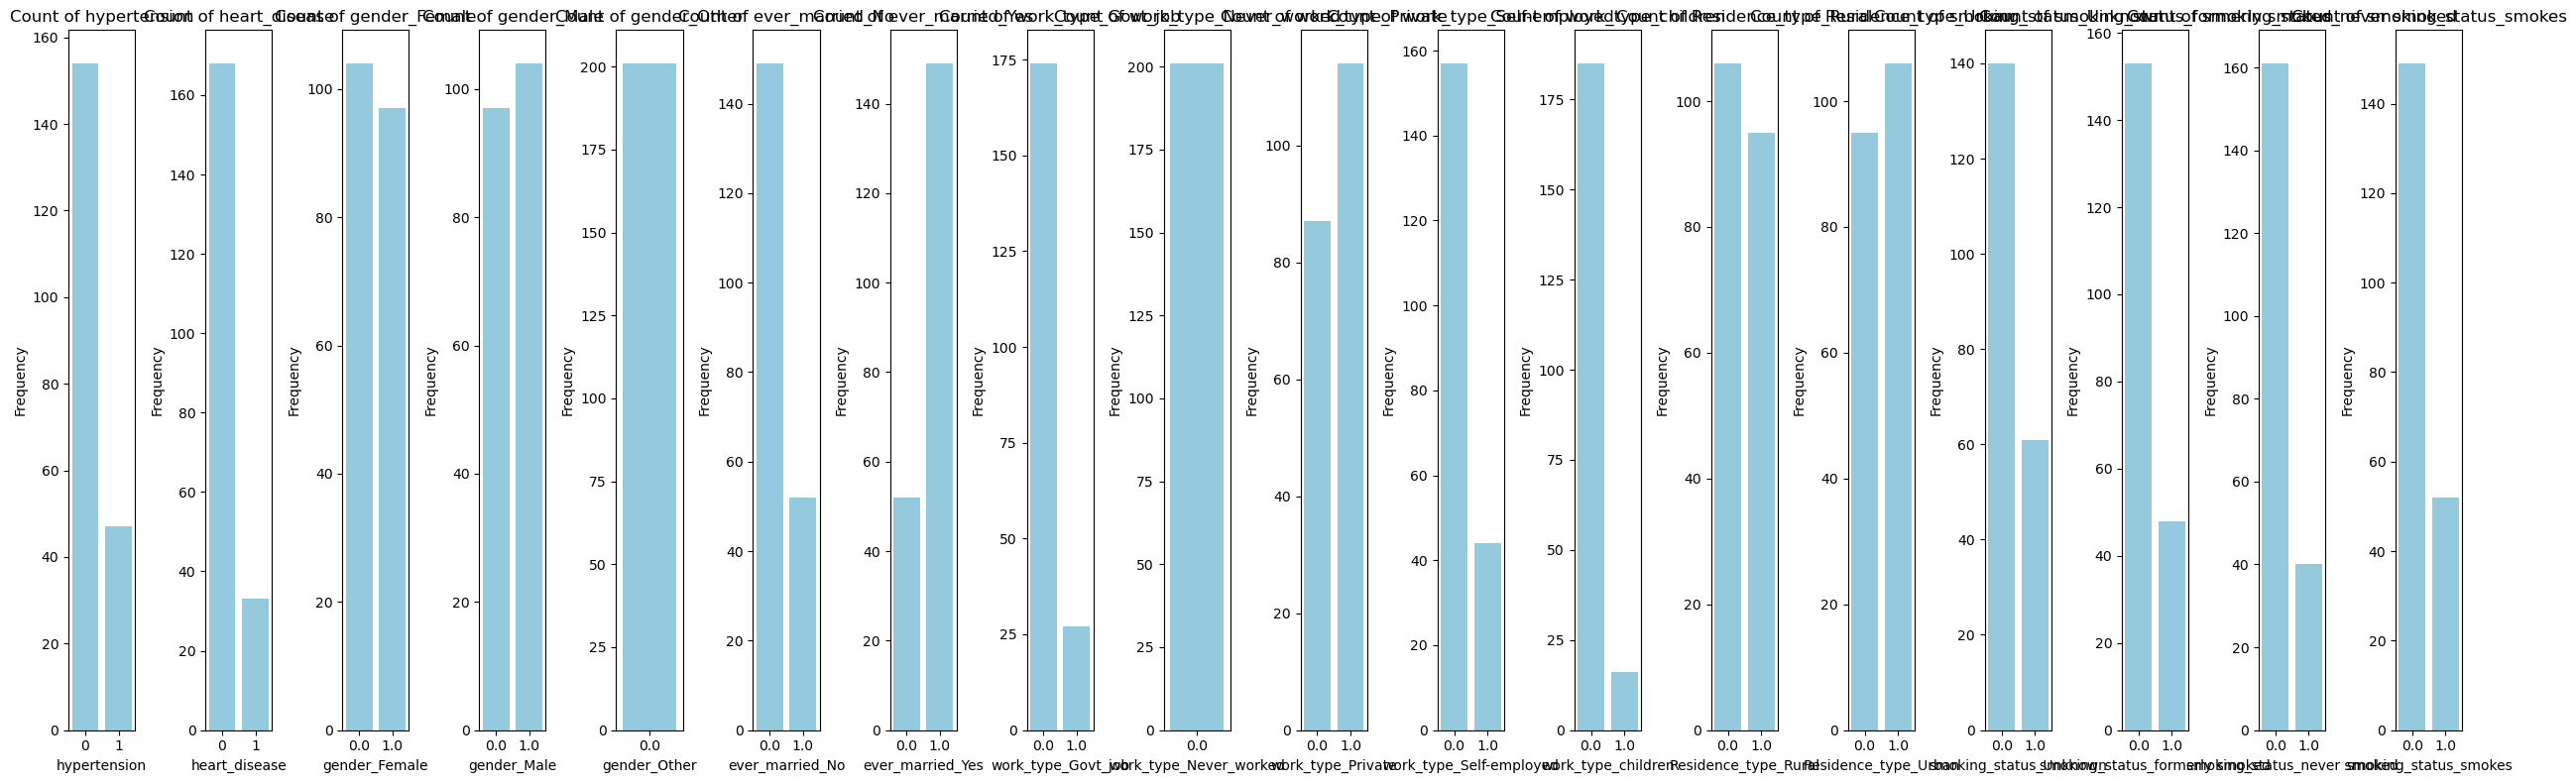

In [34]:
categorical_features =['hypertension','heart_disease','gender_Female', 'gender_Male','gender_Other', 'ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children', 'Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']


plt.figure(figsize=(25,8))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(data=df, x=feature, color='skyblue')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

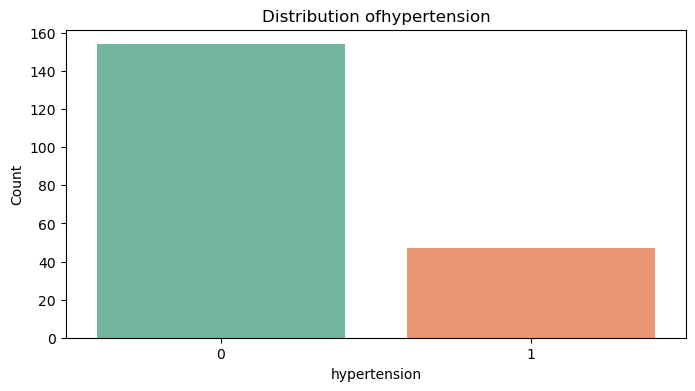

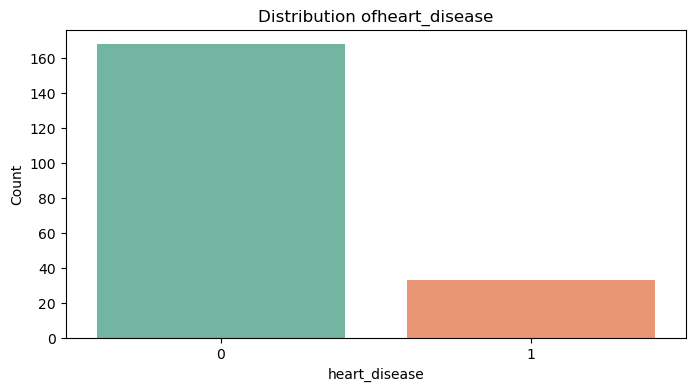

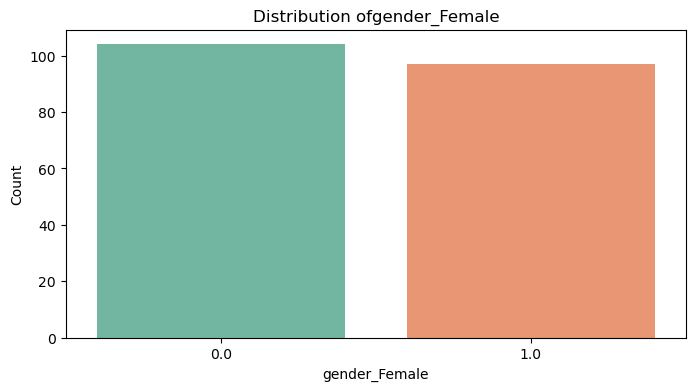

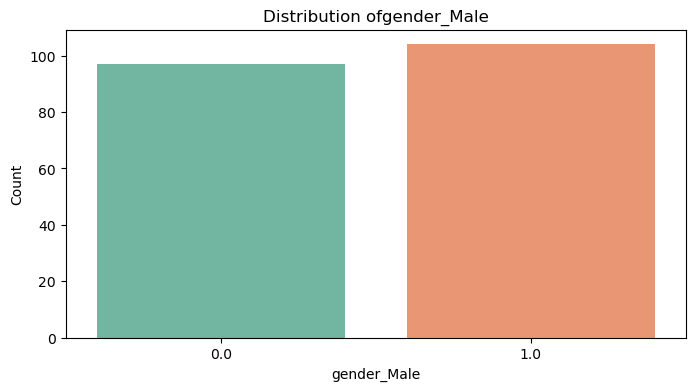

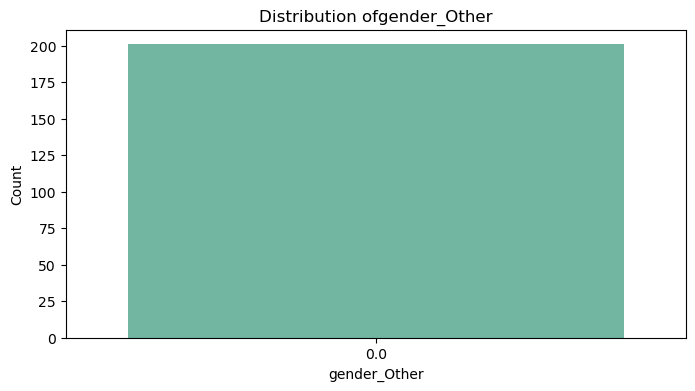

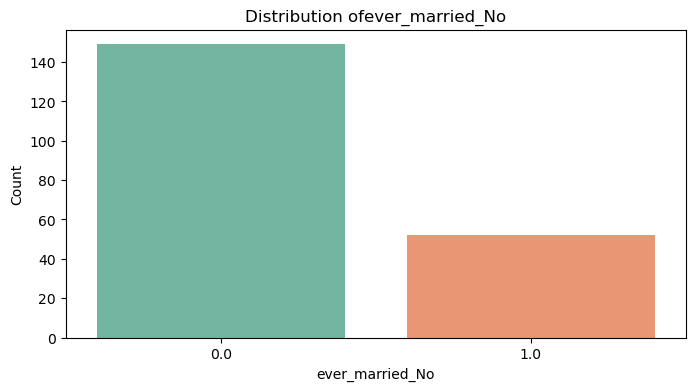

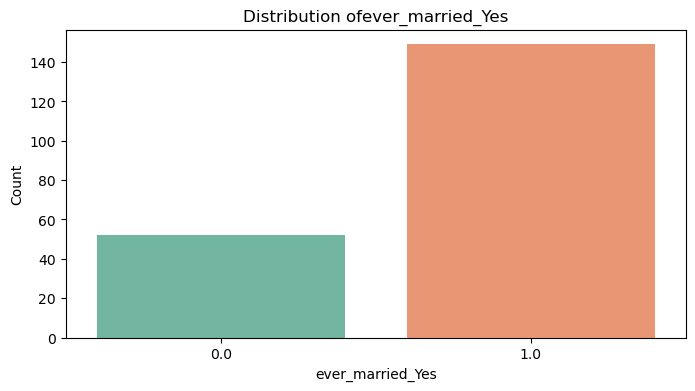

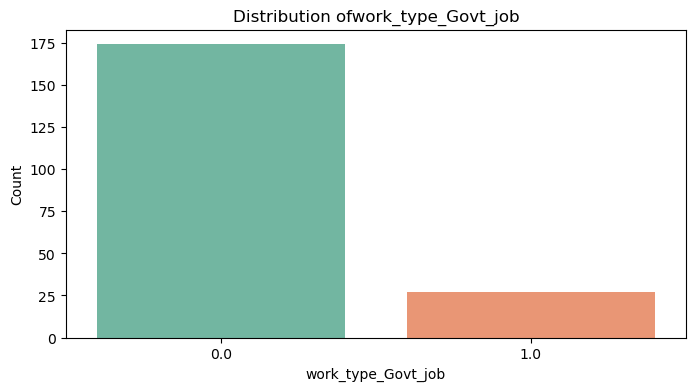

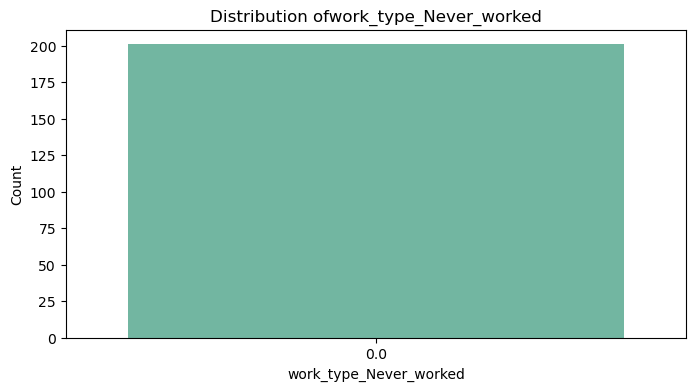

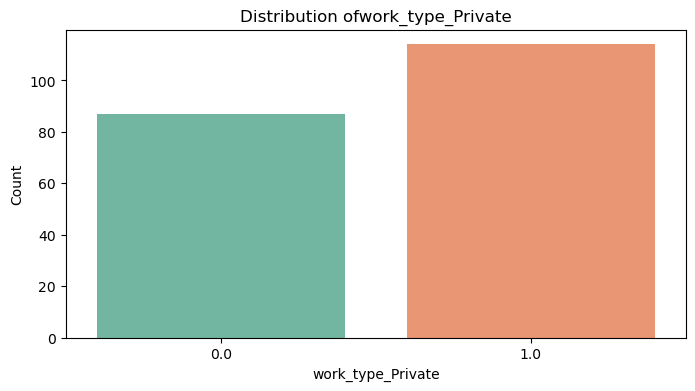

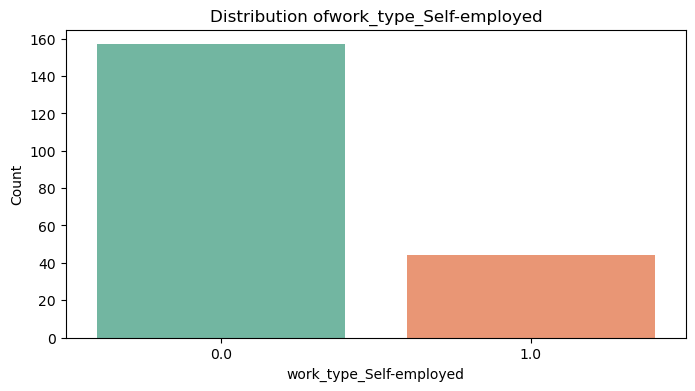

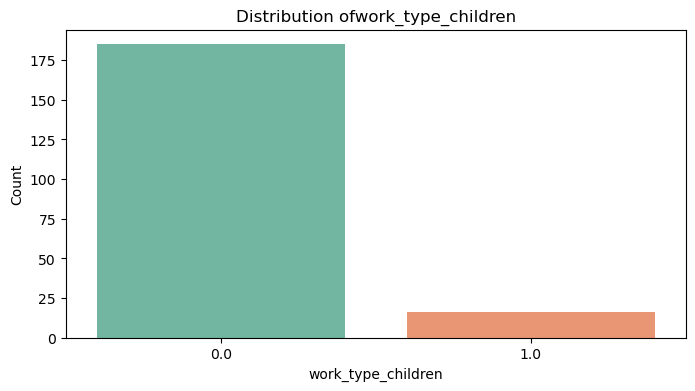

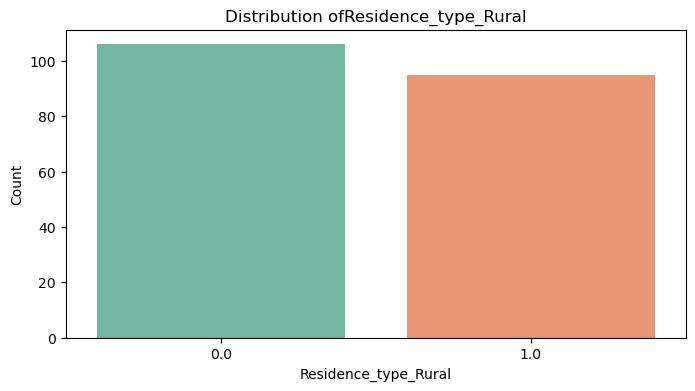

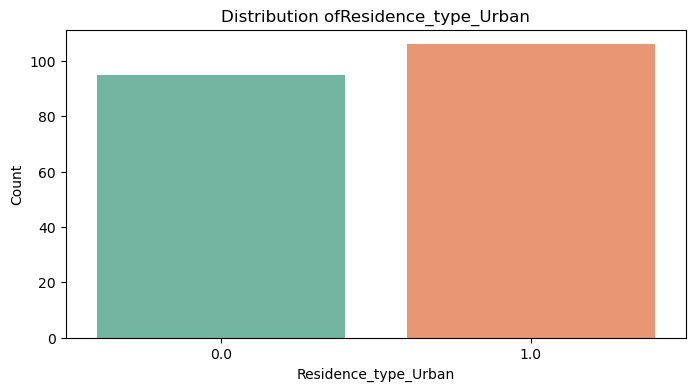

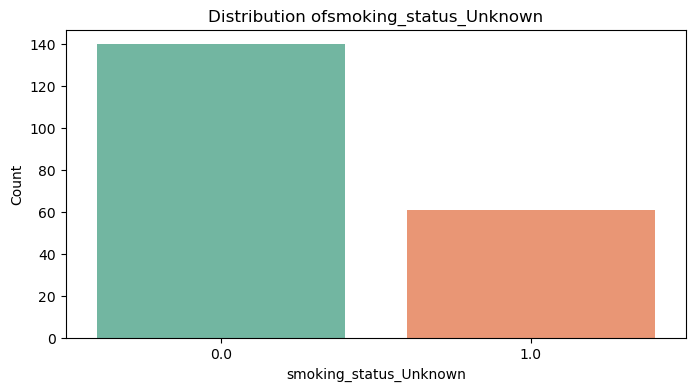

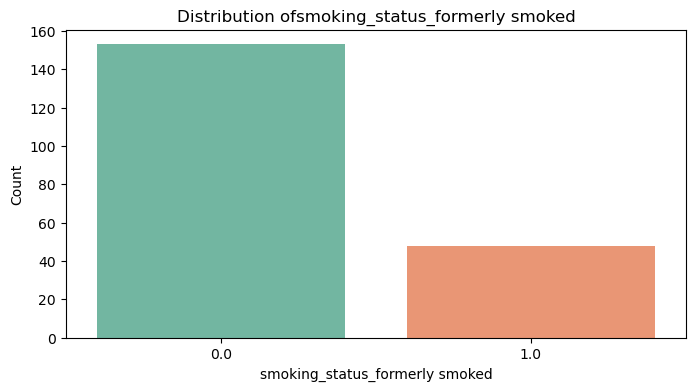

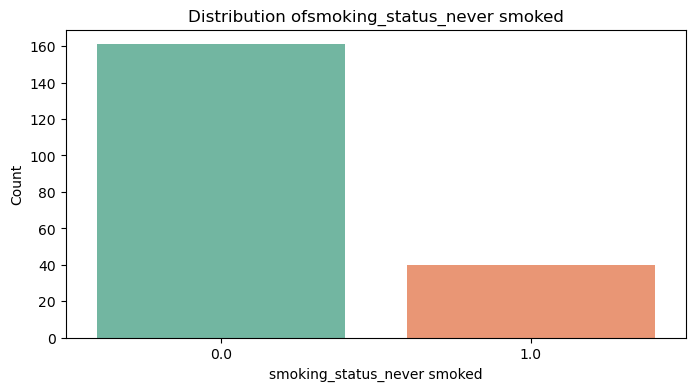

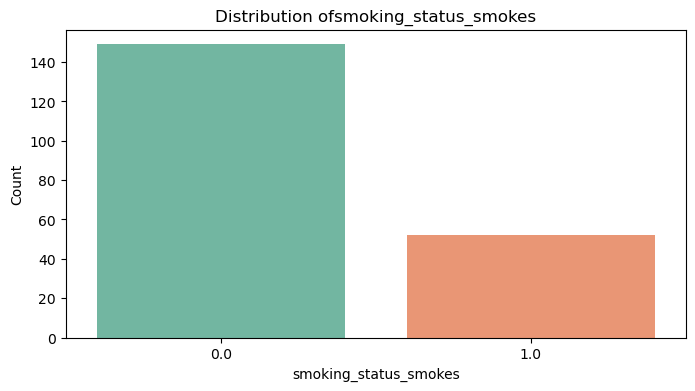

In [159]:
# categorical_features=['hypertension','heart_disease','gender_Female', 'gender_Male','gender_Other', 'ever_married_No','ever_married_Yes','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children', 'Residence_type_Rural','Residence_type_Urban','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']
# for feature in categorical_features:
#     plt.figure(figsize=(8,4))
#     sns.countplot(data=df,x=feature,palette='Set2')
#     plt.title(f'Distribution of{feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Count')

    plt.show()

this turned out to be very confusing due to onehotencoder

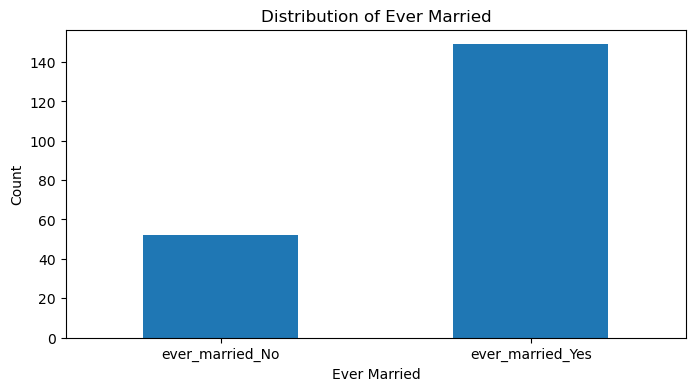

In [171]:
# encoded_counts_ever_married = df[['ever_married_No', 'ever_married_Yes']].sum()
# encoded_counts_ever_married.plot(kind='bar', stacked=True, figsize=(8, 4))
# plt.title('Distribution of Ever Married')
# plt.xlabel('Ever Married')
# plt.ylabel('Count')
# plt.xticks(rotation=0)
# plt.show()

Also, not very practicle , best is to stick with plotting categorical data before encoding.
